# JM1 Dataset
**This Dataset is provided by NASA, it is used to predict software defects. The data consists of 21 features descriping the code of the software, and the 22nd feature is the target, whether it has defects or not.**

>***Attribute Information:***
 1. loc                                    : numeric % McCabe's line count of code
 2. v(g)                                  : numeric % McCabe "cyclomatic complexity"
 3. ev(g)                                : numeric % McCabe "essential complexity"
 4. iv(g)                                 : numeric % McCabe "design complexity"
 5. n                                      : numeric % Halstead total operators + operands
 6. v                                       : numeric % Halstead "volume"
 7. l                                        : numeric % Halstead "program length"
 8. d                                      : numeric % Halstead "difficulty"
 9. i                                        : numeric % Halstead "intelligence"
 10. e                                     : numeric % Halstead "effort"
 11. b                                      : numeric % Halstead 
 12. t                                      : numeric % Halstead's time estimator
 13. lOCode                          : numeric % Halstead's line count
 14. lOComment                  : numeric % Halstead's count of lines of comments
 15. lOBlank                          : numeric % Halstead's count of blank lines
 16. lOCodeAndComment  : numeric
 17. uniq_Op                          : numeric % unique operators
 18. uniq_Opnd                     : numeric % unique operands
 19. total_Op                         : numeric % total operators
 20. total_Opnd                    : numeric % total operands
 21. branchCount                 : numeric % of the flow graph
 22. defects                          : {false,true} % module has/has not one or more reported defects

**Source:**<br>
https://www.openml.org/search?type=data&sort=runs&id=1053&status=active 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, precision_recall_fscore_support, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import resample


#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot


import warnings
warnings.filterwarnings("ignore")

# Data Exploration and Cleaning

In [2]:
df = pd.read_csv('jm1_csv.csv')
df.shape

(10885, 22)

**The data consists of 10885 instances.**

In [3]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17.0,36.0,112.0,86.0,13.0,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17.0,135.0,329.0,271.0,5.0,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11.0,16.0,76.0,50.0,7.0,True


In [4]:
df.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

**Thankfully, all of the features are neumerical excpet the target, so we'll convert it to 1s and 0s.**

In [5]:
#converting the target class to 1 and 0 instead of true/false

df['defects'] = df['defects'].astype('float')
df.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects              float64
dtype: object

In [6]:
# checking for null values
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

**Since the amount of null values in the data isn't alot, so removing them would be alright.**

In [7]:
# removing rows with null values
df.dropna(axis = 0, inplace = True)

In [8]:
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [9]:
# genereal statisctics on the data

df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
count,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.00000,1.088000e+04,...,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000
mean,42.020138,6.347739,3.400037,4.001415,114.391388,673.772003,0.135352,14.177339,29.43885,3.684563e+04,...,26.253125,2.738787,4.625092,0.370956,11.177592,16.751857,68.110588,46.388989,11.292316,0.193290
std,76.608641,13.021924,6.772697,9.118682,249.549291,1939.253379,0.160552,18.712325,34.42332,4.344671e+05,...,59.622819,9.010486,9.969914,1.908391,10.045255,26.667883,151.513836,100.351845,22.597617,0.394897
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.86000,1.619400e+02,...,4.000000,0.000000,0.000000,0.000000,5.000000,4.000000,8.000000,6.000000,3.000000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.92500,2.031020e+03,...,13.000000,0.000000,2.000000,0.000000,11.000000,11.000000,29.000000,19.000000,5.000000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,620.850000,0.160000,18.902500,36.78000,1.141615e+04,...,28.000000,2.000000,5.000000,0.000000,16.000000,21.000000,71.000000,48.000000,13.000000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.78000,3.107978e+07,...,2824.000000,344.000000,447.000000,108.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000,1.000000


# Data Visualization

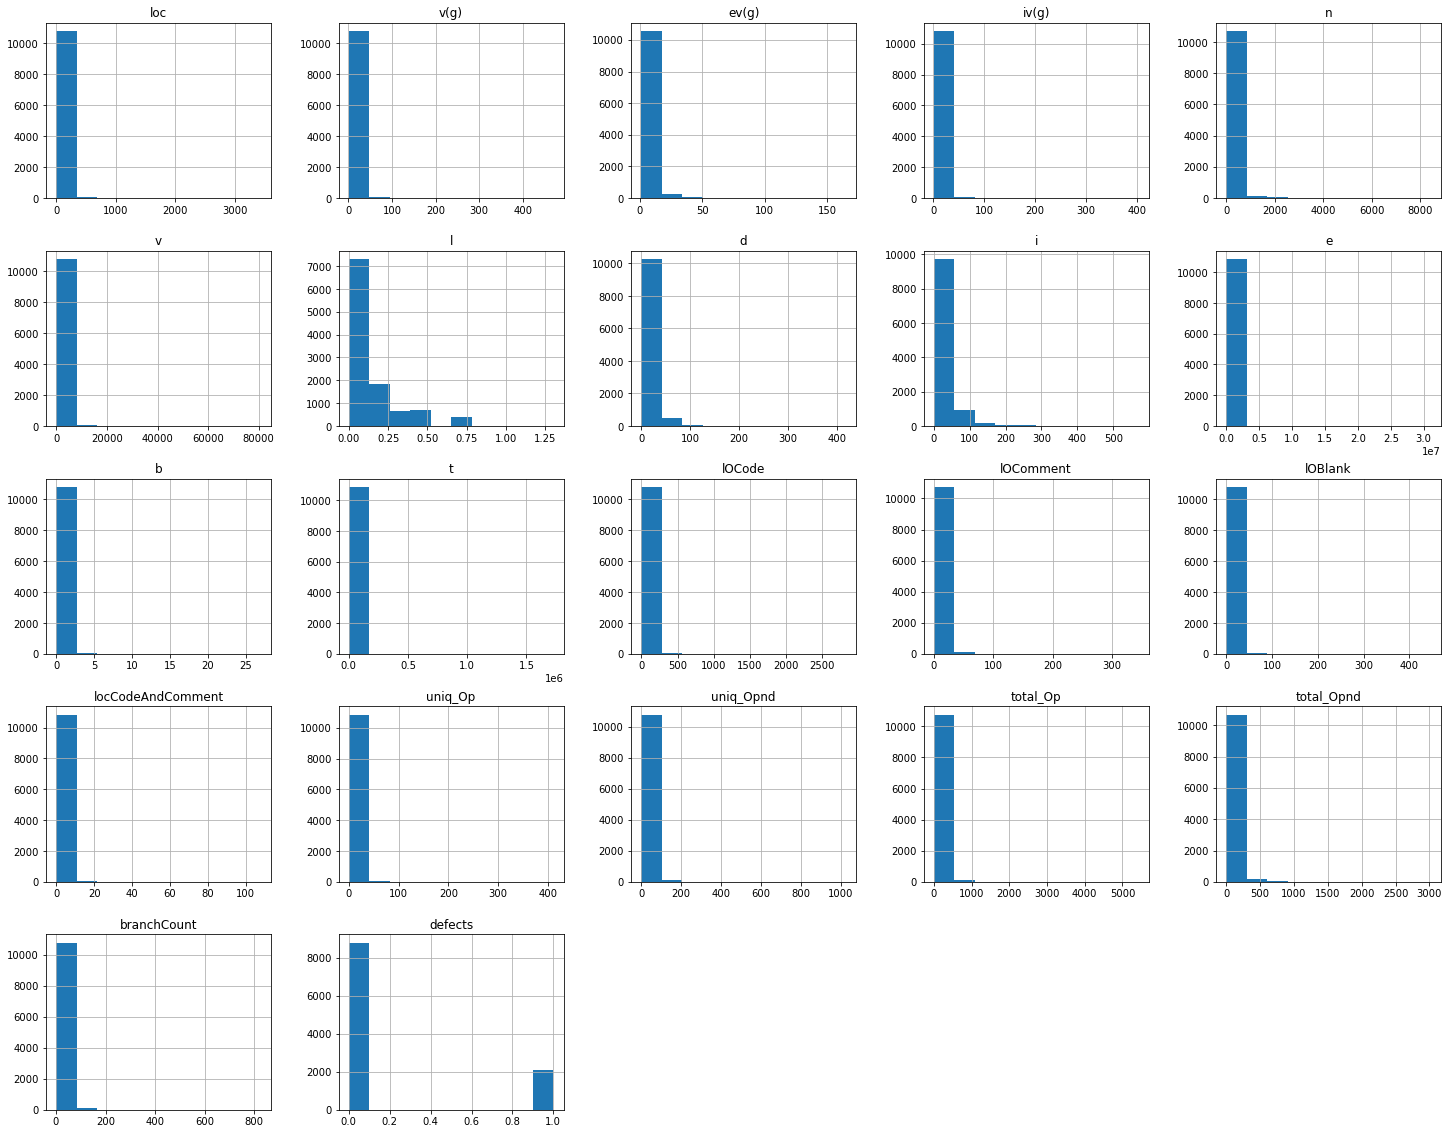

In [10]:
# checking the distribution of data

df.hist(figsize=(25, 20))
plt.show()

**The data  clearly has a very skewed distribution.**

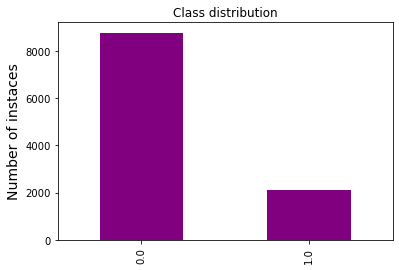

0.0    8777
1.0    2103
Name: defects, dtype: int64


In [12]:
# counting how many instances in each class
classDist = df['defects'].value_counts().plot(kind = 'bar', color= ['purple'],title = 'Class distribution' )
classDist.set_ylabel("Number of instaces",fontsize=14)
plt.show()

# printing the exact number of instances in each class
print (df['defects'].value_counts())

**The class distribution is also skewed, the data is imbalanced.**

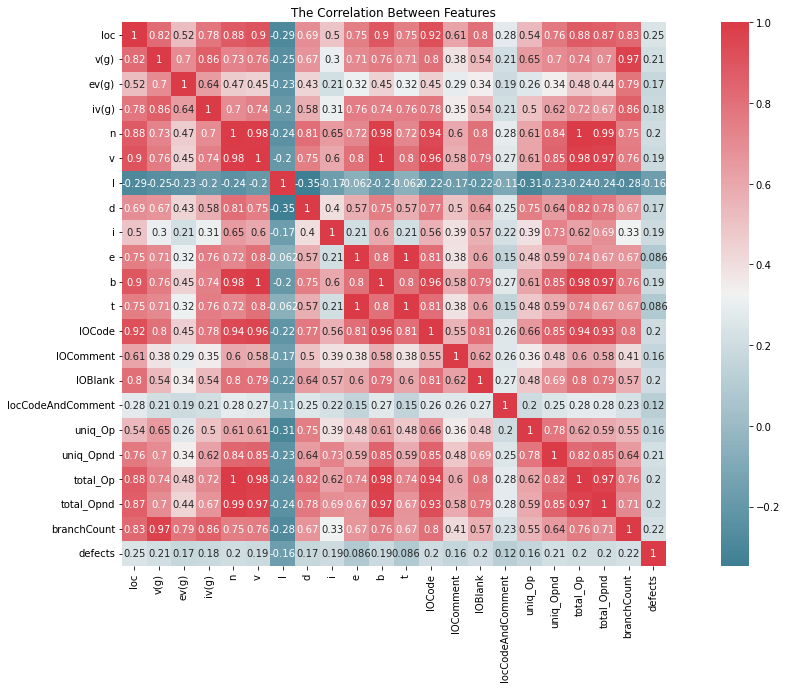

In [13]:
# plotting the correlation matrix using sns heatmap

f, ax = plt.subplots(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot = True, square=True, ax=ax)
plt.title('The Correlation Between Features')
plt.show()

In [14]:
#getting a closer look at the correlation between the features and target

df.corr()['defects']

loc                  0.245437
v(g)                 0.208670
ev(g)                0.172935
iv(g)                0.181981
n                    0.204087
v                    0.189113
l                   -0.164721
d                    0.169442
i                    0.192643
e                    0.086092
b                    0.189318
t                    0.086092
lOCode               0.195857
lOComment            0.161131
lOBlank              0.199489
locCodeAndComment    0.118054
uniq_Op              0.158834
uniq_Opnd            0.211952
total_Op             0.200987
total_Opnd           0.203825
branchCount          0.222754
defects              1.000000
Name: defects, dtype: float64

We can see that the features that have the most correlation with the target (defects) are "**loc", "n", "v(g)", "branchCount", "uniq_Opnd", "total_Op", "total_Opnd"**.

**Plotting the Boxplots of the data to check the outliers.**

In [15]:
# code to visualize interactive boxplot of all features using plotly
#for i in df.columns:
#    trace1 = go.Box(
#        x = df[i],
#        name = i,
#        marker = dict(color = 'blue')
#        )
#    box_data = [trace1]
#    iplot(box_data)

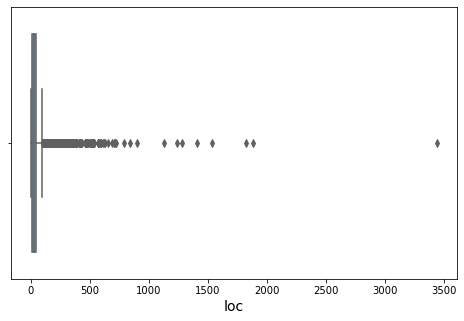

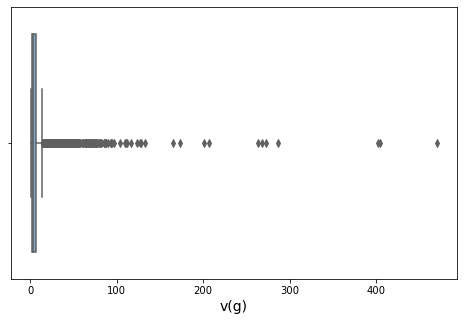

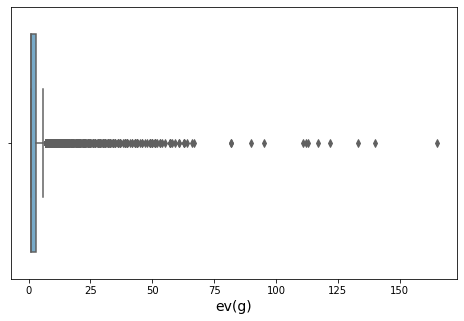

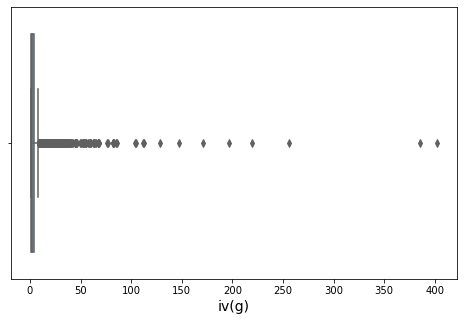

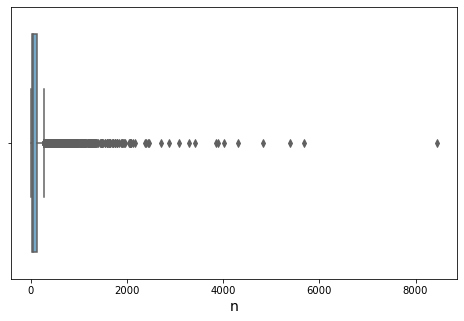

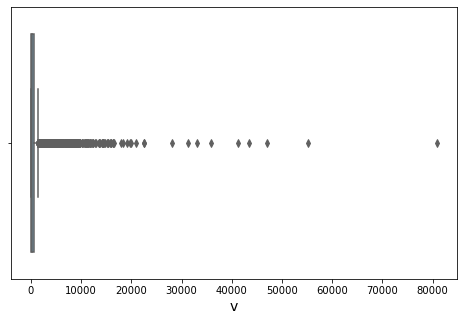

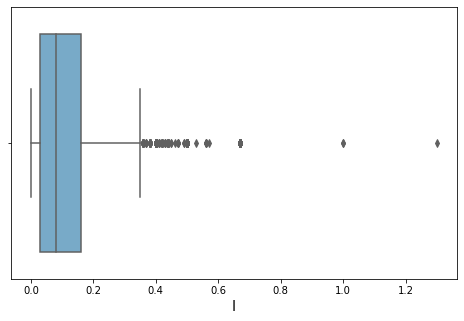

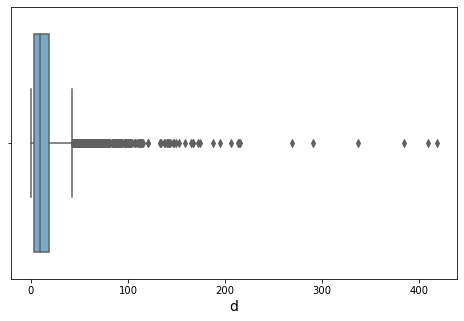

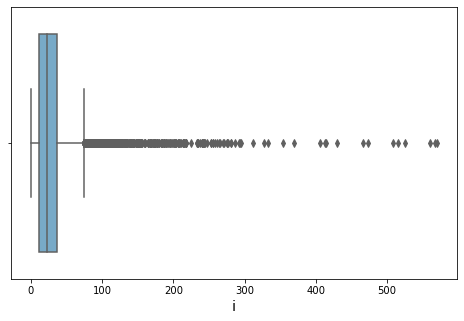

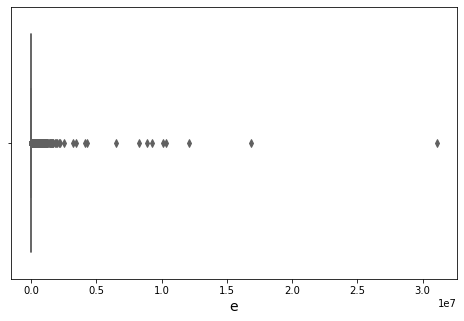

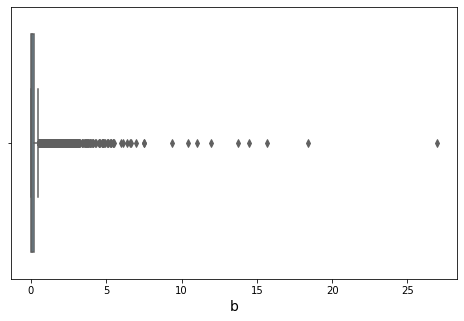

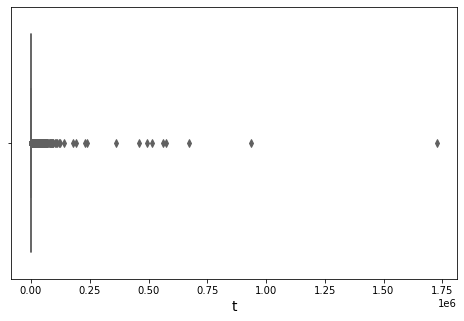

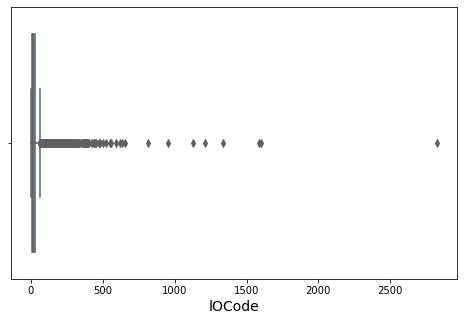

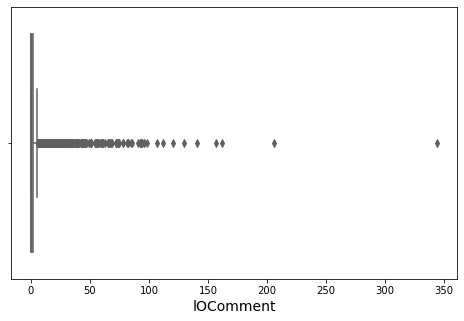

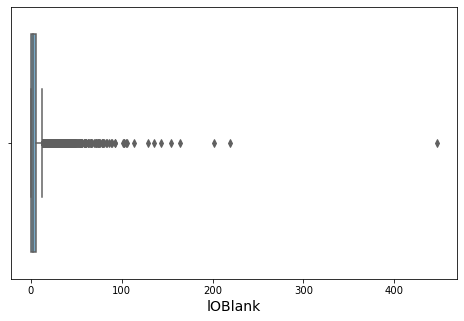

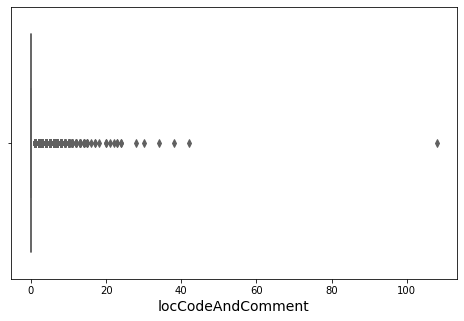

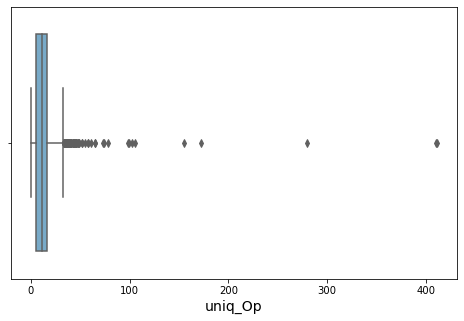

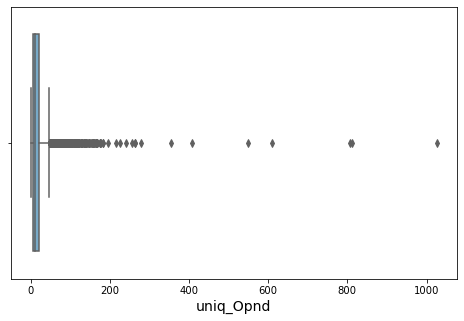

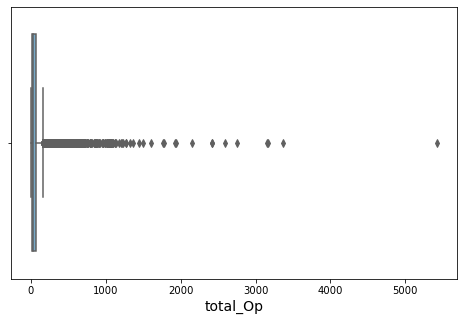

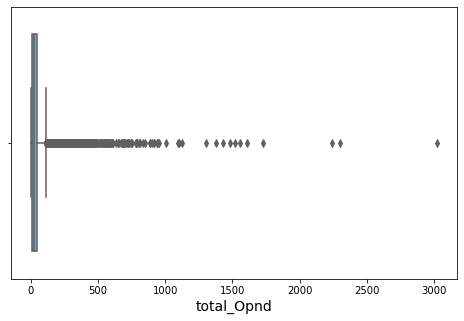

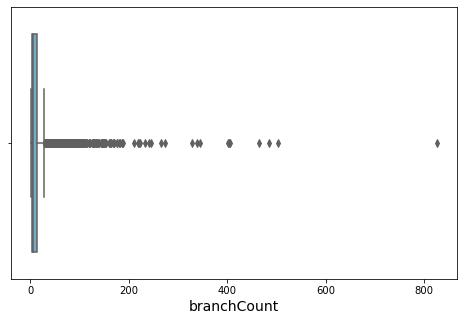

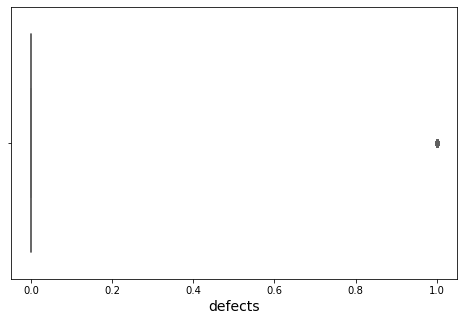

In [16]:
for i in df.columns:
    plt.figure(figsize=(8,5))
    ax = sns.boxplot(x=df[i],palette="Blues")
    ax.set_xlabel(i,fontsize=14)
    plt.show()

**Removing outliers**

In [17]:
# removing outliers from whole dataset using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers.shape

(5301, 22)

In [18]:
print (df_no_outliers['defects'].value_counts())

0.0    5301
Name: defects, dtype: int64


We can see that almost half of the dataset have been removed, and only the instances of class 0 are left. This is not a dataset we can work with, so we'll try to remove the outliers from only the columns with the highest correlation with the target class, which we know from plotting the correlation matrix.

In [19]:
# function that removes outliers from certain columns

def remove_outlier(df, cols):
  for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_out = df.loc[(df[col] > low) & (df[col] < high)]
  return df_out

In [20]:
corr_cols = ['loc', 'n', 'v(g)','branchCount','uniq_Opnd','total_Op','total_Opnd'] # the features with the most correlation to the target
df_no_out = remove_outlier(df, corr_cols)
df_no_out.shape

(9828, 22)

In [21]:
# checking the class distribution after removing outliers
df_no_out['defects'].value_counts()

0.0    8171
1.0    1657
Name: defects, dtype: int64

After Removing outliers from the 7 columns with the highest correlation to the target, we are left with 9828 instances in the data, meaning not alot have been removed, which tells us that most of the outliers are in the columns with low correlation to the target, in that case, removing the outliers may not really affect the classification results.

# Pre-processing

In [22]:
# spplitting the data into features and target class

x = df.iloc[:,:-1]
y=df['defects']

**Now it's time perform feature selection to find the most important features that contribute to an accurate classification. <br> Step Backward Selection (SBS) will be used.**

In [23]:
knn=KNeighborsClassifier()
bfs=SequentialFeatureSelector(knn,n_features_to_select=0.7, direction ='backward')
bfs.fit(x,y)

SequentialFeatureSelector(direction='backward',
                          estimator=KNeighborsClassifier(),
                          n_features_to_select=0.7)

In [24]:
print (bfs.get_support())
print(bfs.n_features_to_select_)

[ True  True  True False  True  True False False  True  True False False
 False  True  True False  True  True  True  True  True]
14


In [25]:
X = bfs.transform(x)

In [26]:
# splitting the data into train and test datasets
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 8704 samples.
Testing set has 2176 samples.


In [27]:
# splitting the data after feature selection into train and test datasets
x_train1,x_test1,y_train1,y_test1 = train_test_split(X, y, test_size = 0.2, random_state=42)

In [28]:
# normalizing the data using StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

**x_train, y_train, etc. ---> Before Feature Selection <br>
x_train1, y_train1, etc. ---> After Feature Selection**

# Modeling

**The classification algorithms i'll be using are:** <br> 
<li> Decision Trees</li>
<li> K-nearest neighbors</li>
<li> Logistic Regression</li> <br>

**Each model will be trained using the models' default parameters at first, then the model's hyperparameters will be fine-tuned using grid search to find the best model.**

In [29]:
# function to train the model and return its performance using different metrics

def fit_train(model, x_train, y_train, x_test, y_test):
  model = model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  
  acc = accuracy_score(y_test, y_pred)
  perf = precision_recall_fscore_support(y_test, y_pred, average = 'macro')
  print("Accuracy: ", acc)
  print(f"Precision : {perf[0]:.4f} Recall : {perf[1]:.4f} Fscore : {perf[2]:.4f}")
  plot_confusion_matrix(model, x_test, y_test)
  plt.show()
  
  auc = roc_auc_score(y_pred, y_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

  plt.legend(loc=4)
  plt.show()
  
# function to plot the learning curve of one model

def plot_learning_curve(model, x, y):
  train_sizes, train_scores, test_scores = learning_curve(model, x, y, cv=5, scoring='accuracy')

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)
  
  plt.subplots(1, figsize=(5,5))
  plt.plot(train_sizes, train_mean, color="b",  label="Training score")
  plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")

  plt.title("Learning Curve")
  plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
  plt.tight_layout()
  plt.show()

# function to plot the learning curve of multiple models we'll use for comparison

def plot_many_learning_curves(model1, model2, model3, x, y):
  train_sizes1, train_scores1, test_scores1 = learning_curve(model1, x, y, cv=5, scoring='accuracy', random_state=42)
  train_sizes2, train_scores2, test_scores2 = learning_curve(model2, x, y, cv=5, scoring='accuracy', random_state=42)
  train_sizes3, train_scores3, test_scores3 = learning_curve(model3, x, y, cv=5, scoring='accuracy', random_state=42)

  train1_mean = np.mean(train_scores1, axis=1)
  train2_mean = np.mean(train_scores2, axis=1)
  train3_mean = np.mean(train_scores3, axis=1)
  test1_mean = np.mean(test_scores1, axis=1)  
  test2_mean = np.mean(test_scores2, axis=1)
  test3_mean = np.mean(test_scores3, axis=1)

  fig, axes = plt.subplots(1, 2, figsize=(15, 5))
  fig.suptitle('Learning Curves', fontsize=15)

  sns.scatterplot(ax=axes[0], x=train_sizes1, y=train1_mean)
  sns.lineplot(ax=axes[0], x=train_sizes1, y=train1_mean)
  sns.scatterplot(ax=axes[0], x=train_sizes2, y=train2_mean)
  sns.lineplot(ax=axes[0], x=train_sizes2, y=train2_mean)
  sns.scatterplot(ax=axes[0], x=train_sizes3, y=train3_mean)
  sns.lineplot(ax=axes[0], x=train_sizes3, y=train3_mean)
  axes[0].set_title('Training')
  axes[0].set_xlabel('Data samples')
  axes[0].set_ylabel('Accuracy')
  axes[0].legend(['DecisionTrees', 'KNN', 'LogisticRegression'])

  sns.scatterplot(ax=axes[1], x=train_sizes1,y=test1_mean)
  sns.lineplot(ax=axes[1], x=train_sizes1,y=test1_mean)
  sns.scatterplot(ax=axes[1], x=train_sizes2,y= test2_mean)
  sns.lineplot(ax=axes[1], x=train_sizes2,y= test2_mean)
  sns.scatterplot(ax=axes[1], x=train_sizes3, y=test3_mean)
  sns.lineplot(ax=axes[1], x=train_sizes3, y= test3_mean)
  axes[1].set_title('Validation')
  axes[1].set_xlabel('Data samples')
  axes[1].set_ylabel('Accuracy')
  axes[1].legend(['DecisionTrees', 'KNN', 'LogisticRegression'])
  plt.show()


## Decision Trees

Accuracy:  0.7647058823529411
Precision : 0.6203 Recall : 0.6189 Fscore : 0.6196


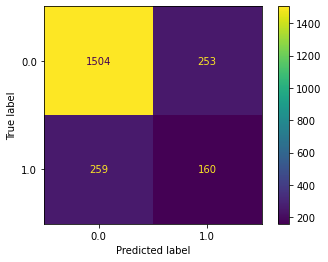

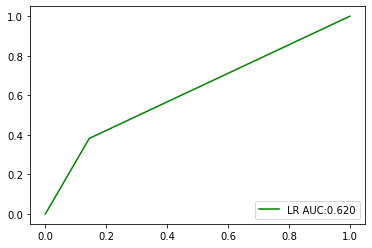

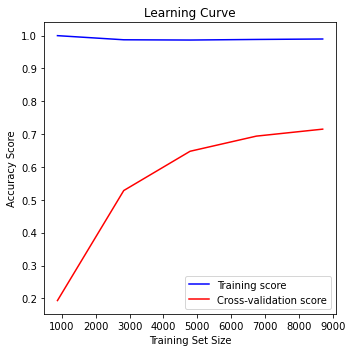

In [30]:
# model before feature selection

tree = DecisionTreeClassifier()
fit_train(tree, x_train, y_train, x_test, y_test)
plot_learning_curve(tree, x, y)

Accuracy:  0.7536764705882353
Precision : 0.6034 Recall : 0.6030 Fscore : 0.6032


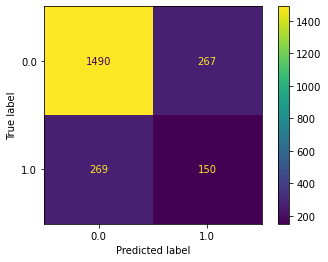

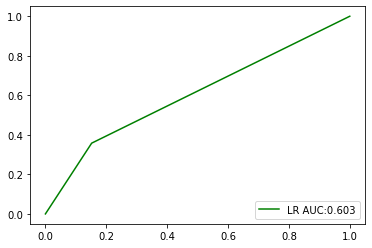

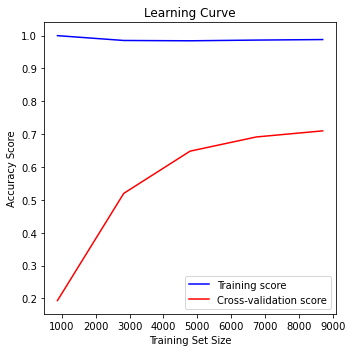

In [31]:
# model after feature selection

tree1 = DecisionTreeClassifier()
fit_train(tree1, x_train1, y_train1, x_test1, y_test1)
plot_learning_curve(tree1, X, y)

**It is apparent that the feature selection has actually decreased the performance of the model rather than increase it. And both models before and after are overfitting.**

**Grid Search**

Accuracy:  0.78125
Precision : 0.6209 Recall : 0.5901 Fscore : 0.5994


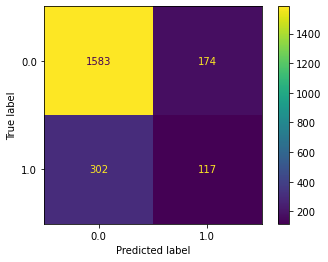

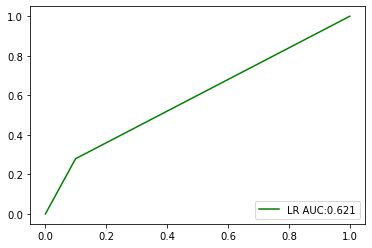

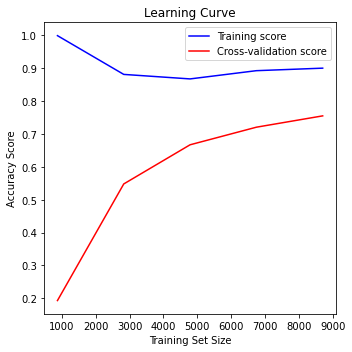

In [32]:
parameters = {'max_depth': range(1,20), 
              'min_samples_split': range(1,10),
              'min_samples_leaf': range(1,5),
              'criterion': ['gini','entropy']}

grid = GridSearchCV(tree, parameters, scoring='f1')
grid_fit = grid.fit(x_train, y_train)

bestTree = grid_fit.best_estimator_
fit_train(bestTree, x_train, y_train, x_test, y_test)
plot_learning_curve(bestTree, x, y)

In [33]:
print(grid_fit.best_params_)

{'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 4, 'min_samples_split': 3}


**The best model found by the grid search gives higher accuracy than the one with the default parameters, however, it does give a lower F-score. The overfitting was reduced slightly but still exists.**

# K-nearest neighbors

Accuracy:  0.7895220588235294
Precision : 0.6322 Recall : 0.5898 Fscore : 0.6009


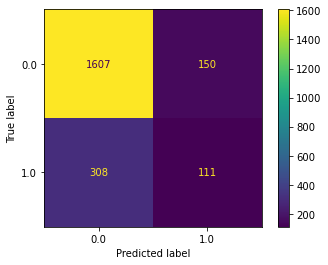

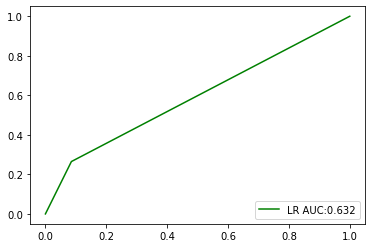

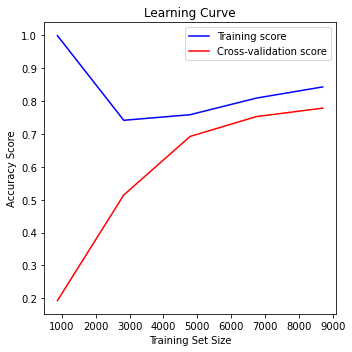

In [34]:
#model before feature selection

knn = KNeighborsClassifier(metric= 'euclidean')
fit_train(knn, x_train, y_train, x_test, y_test)
plot_learning_curve(knn,x, y)

Accuracy:  0.7909007352941176
Precision : 0.6339 Recall : 0.5888 Fscore : 0.6001


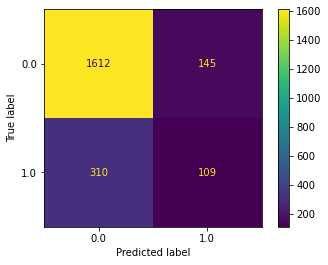

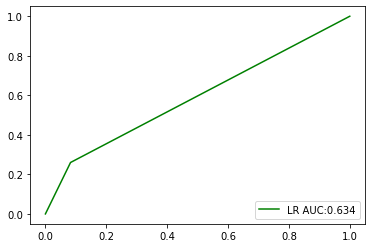

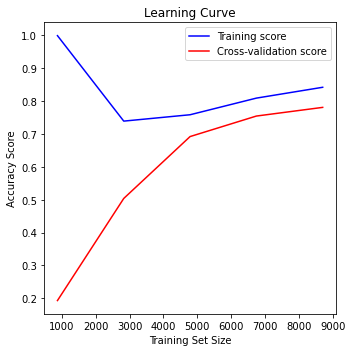

In [35]:
# model after feature selection

knn1 = KNeighborsClassifier(metric= 'euclidean')
fit_train(knn1, x_train1, y_train1, x_test1, y_test1)
plot_learning_curve(knn1, X, y)

**In the case of KNN, the model after feature selection has improved very slightly. Also, unlike decision Trees, the models aren't really overfitting.**

**Grid Search**

Accuracy:  0.8023897058823529
Precision : 0.6464 Recall : 0.5623 Fscore : 0.5685


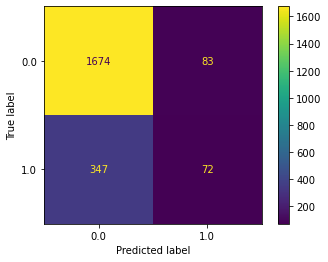

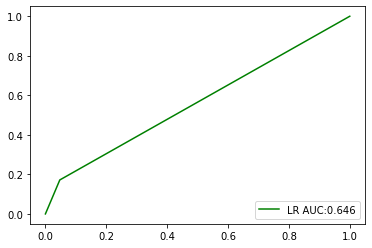

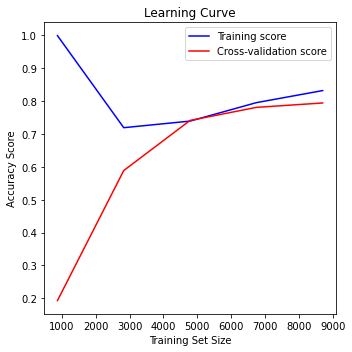

In [36]:
knnparameters = {'n_neighbors':range(0,10,2)}

knngrid = GridSearchCV(knn, knnparameters, scoring='f1')
knn_grid_fit = knngrid.fit(x_train, y_train)

bestknn = knn_grid_fit.best_estimator_
fit_train(bestknn, x_train, y_train, x_test, y_test)
plot_learning_curve(bestknn, x,y)

In [37]:
print(knn_grid_fit.best_params_)

{'n_neighbors': 6}


**The grid search model resulted in the best CV accuracy so far.**

# Logistic Regression

Accuracy:  0.8125
Precision : 0.6915 Recall : 0.5504 Fscore : 0.5484


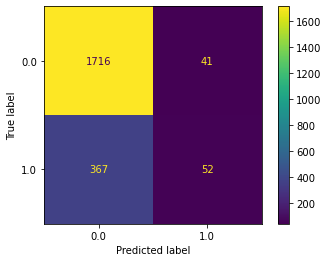

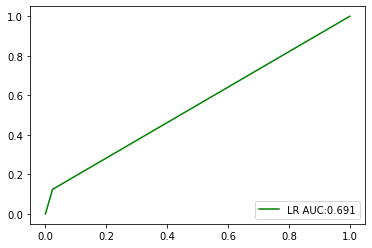

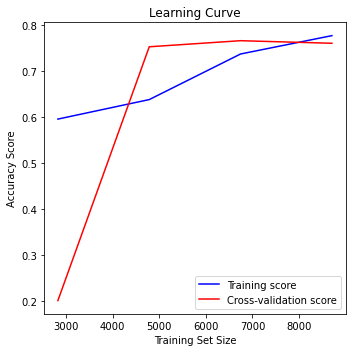

In [38]:
#model before feature selection
logreg = LogisticRegression()
fit_train(logreg, x_train, y_train, x_test, y_test)
plot_learning_curve(logreg, x, y)

Accuracy:  0.8147977941176471
Precision : 0.7067 Recall : 0.5527 Fscore : 0.5517


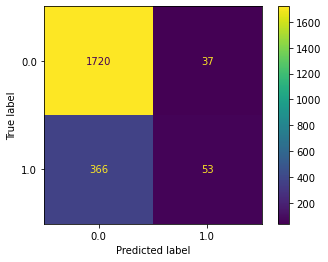

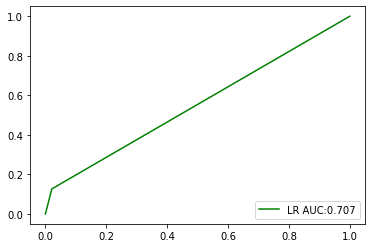

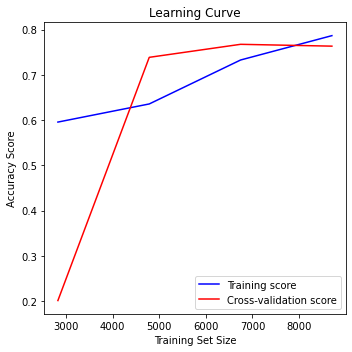

In [39]:
# model after feature selection
logreg1 = LogisticRegression()
fit_train(logreg1, x_train1, y_train1, x_test1, y_test1)
plot_learning_curve(logreg1, X, y)

**Feature selection has improved the performance of the logistic regression model slightly.**

**Grid Search**

Accuracy:  0.8111213235294118
Precision : 0.6829 Recall : 0.5486 Fscore : 0.5459


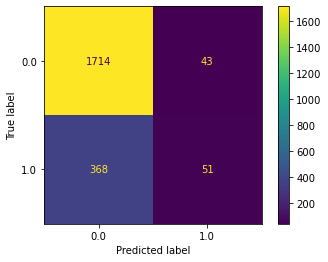

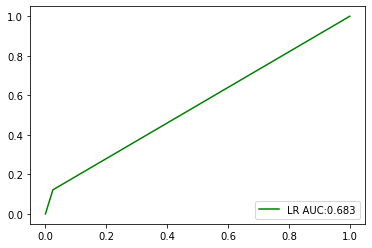

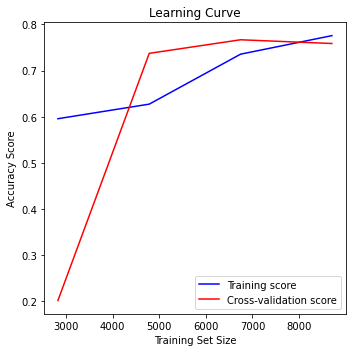

In [40]:
logregparameters = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

logreggrid = GridSearchCV(logreg, logregparameters, scoring='f1')
logreg_grid_fit = logreggrid.fit(x_train, y_train)

bestlogreg = logreg_grid_fit.best_estimator_
fit_train(bestlogreg, x_train, y_train, x_test, y_test)
plot_learning_curve(bestlogreg, x, y)

In [41]:
print(logreg_grid_fit.best_params_)

{'C': 1000}


**The best model found by the grid search doesn't really improve the results that much.**

**Visualizing the learning curves of all three models.**

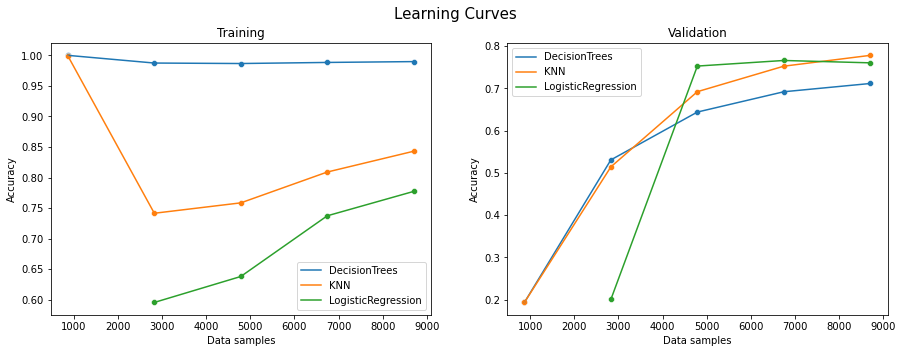

In [42]:
plot_many_learning_curves(tree, knn, logreg, x, y)

**Some models are overfitting, and others aren't performing well at all. We'll try handling the class imbalance problem we have to see if it is the reason behind the models' bad performance.**

## Handling class imbalance

**Since the class imbalance in the data is producing unfavorable results, We'll try two methods to see if they improve the models' performances.**

**First, upsampling. Making the number of instances of each class in the training data equal by oversampling the minority class by creating copies of its instances.**

In [43]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x, y, test_size = 0.2, random_state=42)
# concatenate training data back together
train = pd.concat([x_train2, y_train2], axis=1)

# separate minority and majority classes
not_defected = train[train.defects==0]
defected = train[train.defects==1]

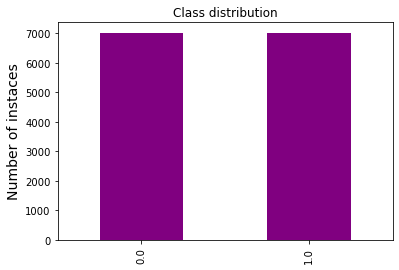

In [44]:
# upsample minority
defected_upsampled = resample(defected,
                          replace=True,
                          n_samples=len(not_defected), # match number in majority class
                          random_state=42) # reproducible results

upsampled = pd.concat([not_defected, defected_upsampled])
# check new class distribution
classDist = upsampled['defects'].value_counts().plot(kind = 'bar', color= ['purple'],title = 'Class distribution' )
classDist.set_ylabel("Number of instaces",fontsize=14)
plt.show()

In [45]:
x_upsampled =upsampled.iloc[:,:-1]
y_upsampled = upsampled['defects']
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_upsampled, y_upsampled, test_size = 0.2, random_state=42)

**Now that we have balanced class distribution, let's try the models again to see if class imbalance really was the reason in the low performance.**

Accuracy:  0.8903133903133903
Precision : 0.8957 Recall : 0.8905 Fscore : 0.8900


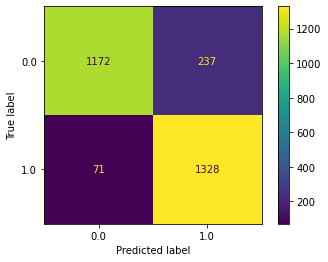

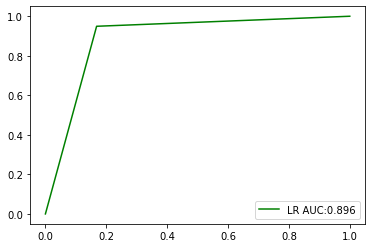

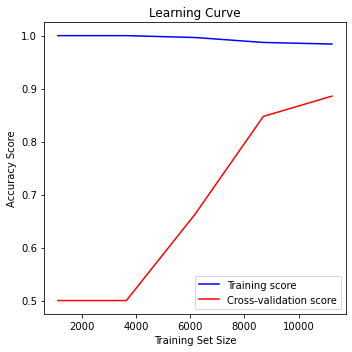

In [46]:
tree2 = DecisionTreeClassifier()
fit_train(tree2, x_train2, y_train2, x_test2, y_test2)
plot_learning_curve(tree2, x_upsampled, y_upsampled)

Accuracy:  0.7603276353276354
Precision : 0.7728 Recall : 0.7607 Fscore : 0.7577


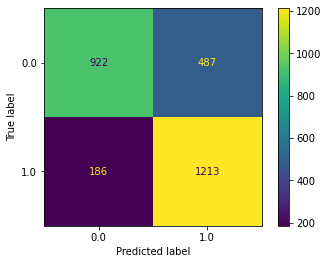

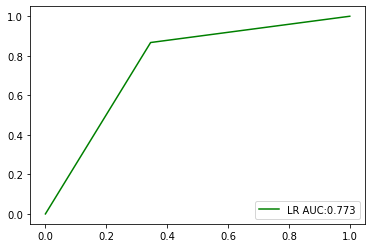

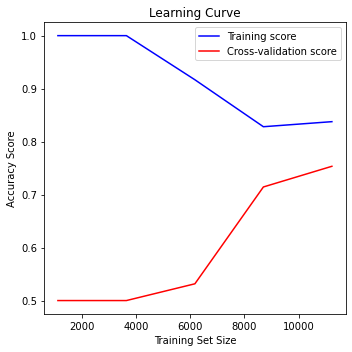

In [47]:
knn2 = KNeighborsClassifier(metric= 'euclidean')
fit_train(knn2, x_train2, y_train2, x_test2, y_test2)
plot_learning_curve(knn1, x_upsampled, y_upsampled)

Accuracy:  0.6424501424501424
Precision : 0.6424 Recall : 0.6424 Fscore : 0.6424


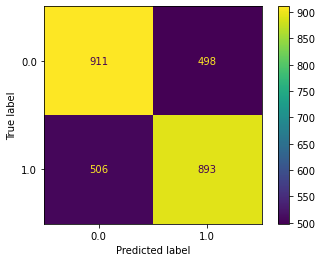

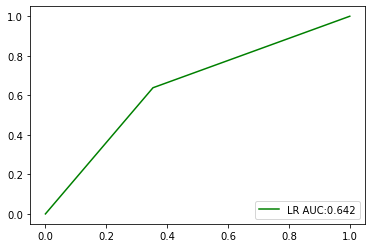

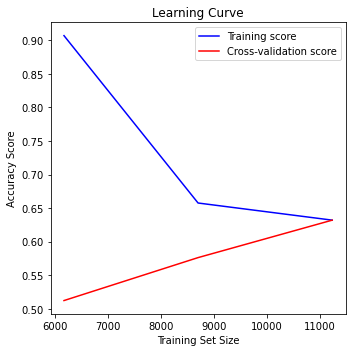

In [48]:
logreg2 = LogisticRegression()
fit_train(logreg2, x_train2, y_train2, x_test2, y_test2)
plot_learning_curve(logreg2, x_upsampled, y_upsampled)

**Visualizing the three models' learning curves.**

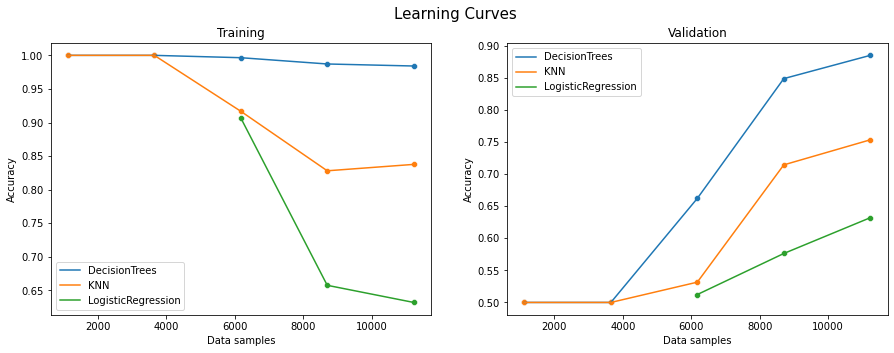

In [49]:
plot_many_learning_curves(tree2, knn2, logreg2, x_upsampled, y_upsampled)

**Upsampling greatly improved the performance of the DecisionTree model, however, it decreased the performance of the logistic regression model alot.**


**Second, undersampling. Making the number of instances of each class in the training data equal by undersampling the majority class, in this case, we'll have much less data to work with.**

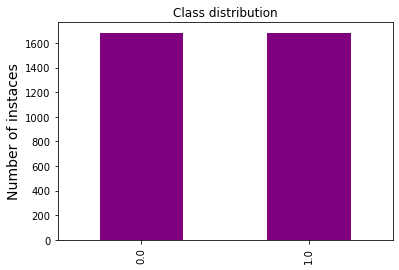

In [50]:
not_defected_downsampled = resample(not_defected,
                                replace = False,
                                n_samples = len(defected), 
                                random_state = 42)  

downsampled = pd.concat([not_defected_downsampled, defected])

# checking class distribution
classDist = downsampled['defects'].value_counts().plot(kind = 'bar', color= ['purple'],title = 'Class distribution' )
classDist.set_ylabel("Number of instaces",fontsize=14)
plt.show()

In [51]:
x_downsampled =downsampled.iloc[:,:-1]
y_downsampled = downsampled['defects']
x_train3,x_test3,y_train3,y_test3 = train_test_split(x_downsampled, y_downsampled, test_size = 0.2, random_state=42)

Accuracy:  0.6172106824925816
Precision : 0.6150 Recall : 0.6152 Fscore : 0.6151


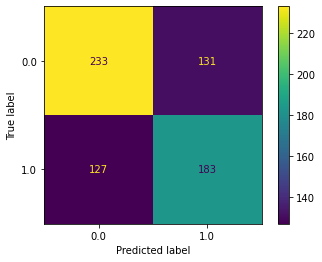

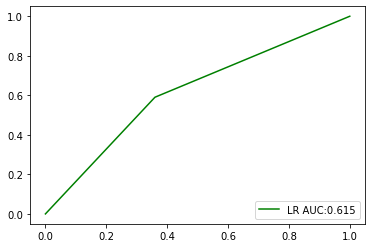

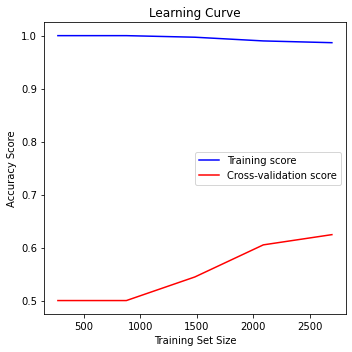

In [52]:
tree3 = DecisionTreeClassifier()
fit_train(tree3, x_train3, y_train3, x_test3, y_test3)
plot_learning_curve(tree3, x_downsampled, y_downsampled)

Accuracy:  0.5964391691394659
Precision : 0.5966 Recall : 0.5972 Fscore : 0.5958


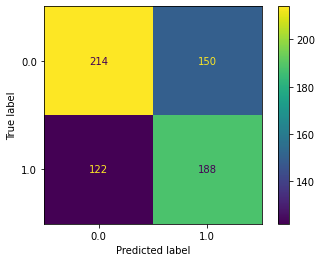

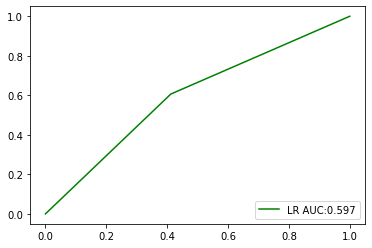

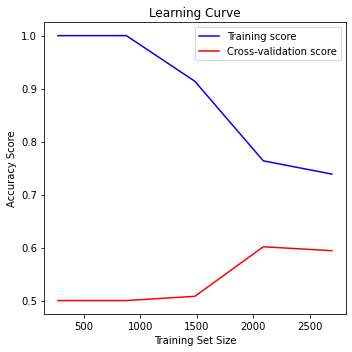

In [53]:
knn3 = KNeighborsClassifier(metric= 'euclidean')
fit_train(knn3, x_train3, y_train3, x_test3, y_test3)
plot_learning_curve(knn3, x_downsampled, y_downsampled)

Accuracy:  0.6083086053412463
Precision : 0.6200 Recall : 0.6165 Fscore : 0.6072


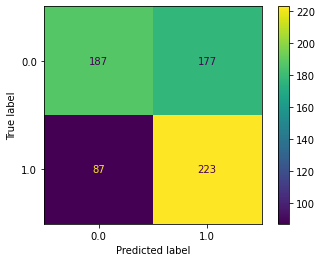

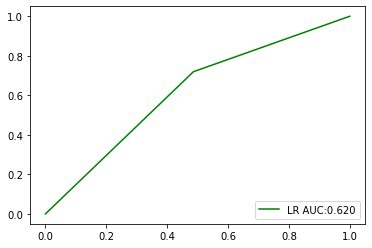

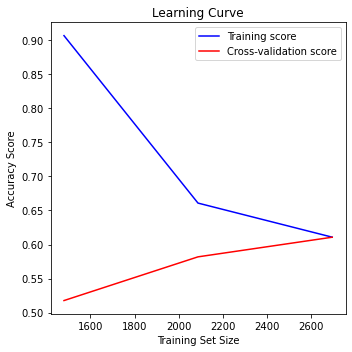

In [54]:
logreg3 = LogisticRegression()
fit_train(logreg3, x_train3, y_train3, x_test3, y_test3)
plot_learning_curve(logreg3, x_downsampled, y_downsampled)

**Visualizing the three models' learning curve.**

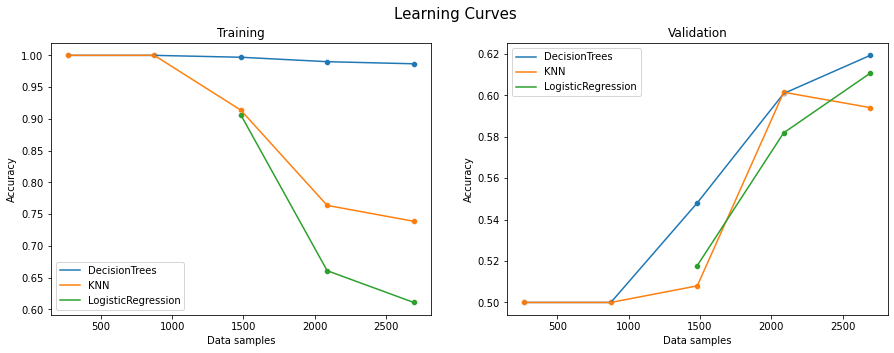

In [55]:
plot_many_learning_curves(tree3, knn3, logreg3, x_downsampled, y_downsampled)

**Since downsampling involves training over small amounts of data, it decreased all of the models' performances. To handle the class imbalance problem in our data, Upsampling instead should be used, since it produced good accuracies.**